In [1]:
import sys
import os

# 添加 factor_evaluation.pyd 所在的目录到系统路径
pyd_path = r"D:\MG\！internship\！4L CAPITAL\因子评估器"
sys.path.append(pyd_path)

# 导入模块
from factor_evaluation import FactorEvaluation
from factor_evaluation import DataService
import numpy as np
import pandas as pd

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

In [4]:
def volume_boosted_kdj_factor(df, kdj_period=9, vol_window=5):
    """Enhances KDJ signals with volume confirmation"""
    # KDJ Calculation
    low_min = df['low'].rolling(kdj_period, min_periods=1).min()
    high_max = df['high'].rolling(kdj_period, min_periods=1).max()
    rsv = 100 * (df['close'] - low_min) / (high_max - low_min + 1e-8)
    K = rsv.ewm(span=3, adjust=False).mean()
    D = K.ewm(span=3, adjust=False).mean()
    j_line = 3*K - 2*D
    
    # Volume confirmation
    vol_ma = df['volume'].rolling(vol_window).mean()
    vol_boost = np.where(df['volume'] > 1.5 * vol_ma, 1.5, 1.0)
    
    # Combine with J-line extreme signals
    j_extreme = np.clip((j_line - 50) / 50, -1, 1)
    return j_extreme * vol_boost

In [5]:
evaluator.set_factor(
    factor_data_or_func=volume_boosted_kdj_factor,
    factor_name='volume_boosted_kdj_factor'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
📈 平稳性检验 (ADF):
   p_value: 0.000000
   是否平稳: 是
🔗 相关性分析:
   IC (Pearson): 0.007745
   Rank_IC (Spearman): -0.020886
📊 信息比率:
   IR: 0.182041
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130379
   因子列: volume_boosted_kdj_factor
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


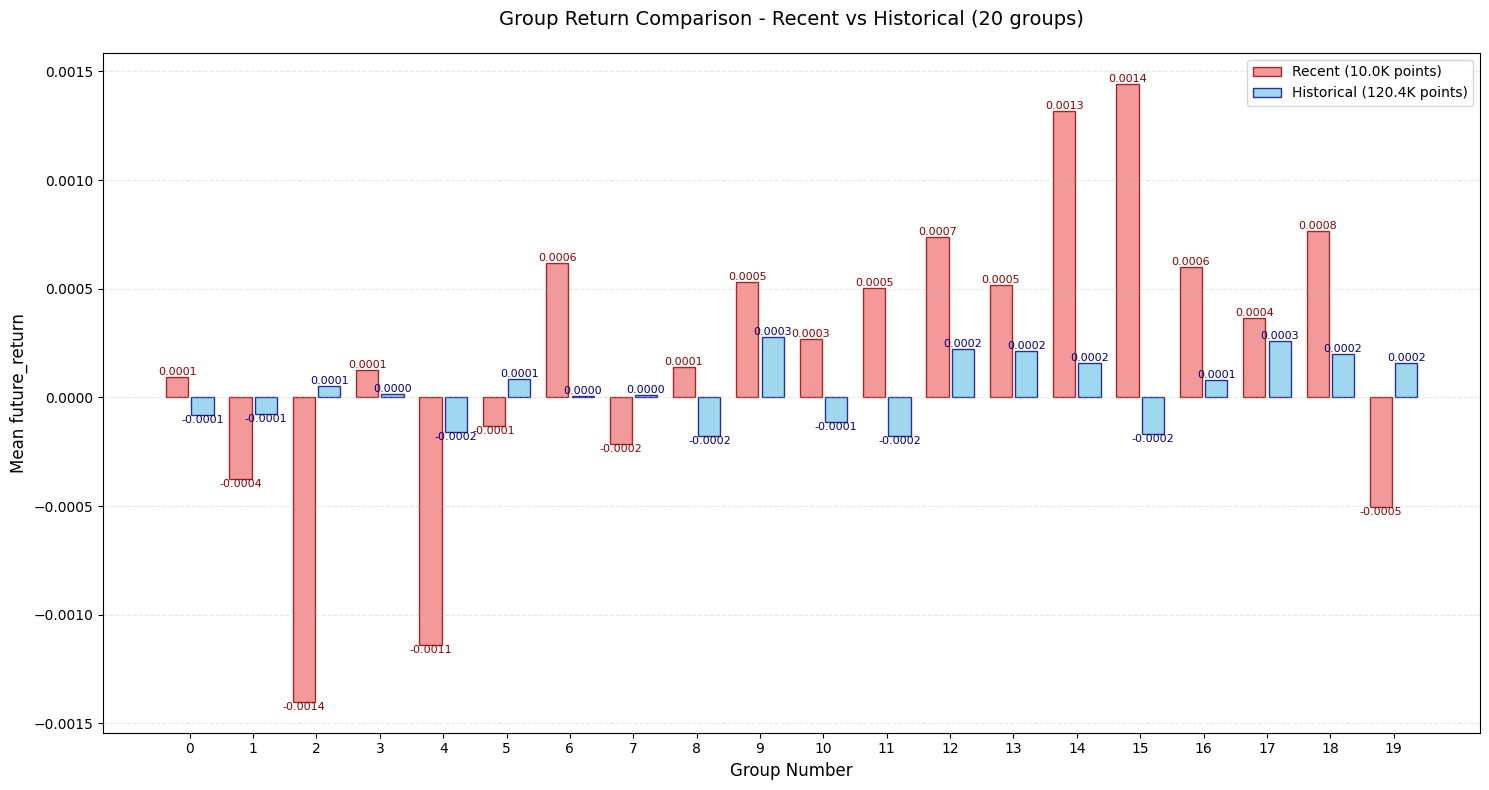

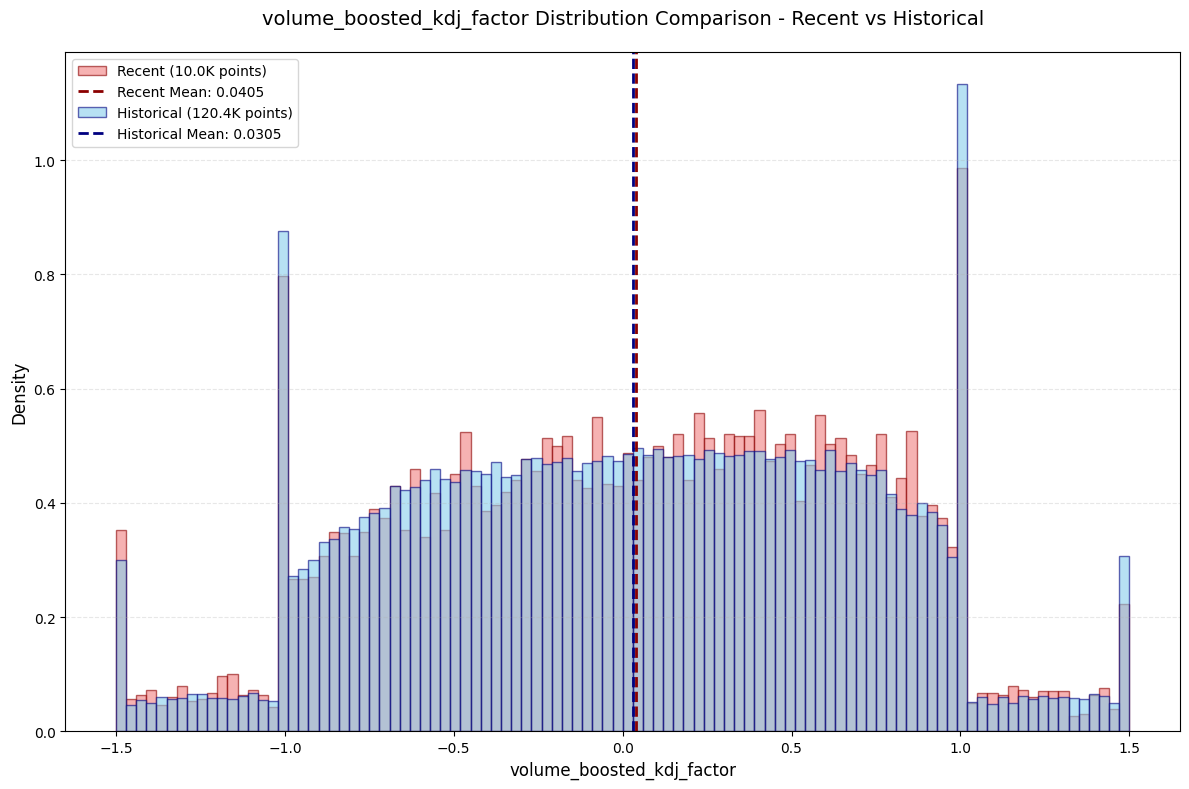

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=True)